<a href="https://colab.research.google.com/github/annalisaabbate/ai4all-asl-model/blob/main/logistic_regression_and_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install all the required libraries
!pip install opencv-python
import os
import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# #use Image data generator to load, scale and split the data
# '''helps load images from dolders and applies preprocessing like rescaling and augmentation'''
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# #build a basic cnn model
# import tensorflow as tf
# from tensorflow.keras import layers, models



## Connect to Kaggle using Token

To download data from kaggle a json token file must be in an accessible directory. To get this file, start by going to Kaggle Settings in your account.

Scroll down to API
Click on Create New Token, this should allow for the automatic download of a kaggle.json file.
Upload this file into Google Drive where you will be downloading the Kaggle data, in this example I have created a folder called "Kaggle"

In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json from your downloads folder


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harishitham","key":"e00f0afe01a428267dd727dda4b1644a"}'}

# Loading the dataset

*   Installed Kaggle CLI
*   Uploaded and set up kaggle.json
*   Downloaded the ASL alphabet dataset (87,000 images)
* verified that the zip file is in the workspace


In [ ]:
import os
import shutil

# Move kaggle.json to the proper directory
if not os.path.exists("/root/.kaggle"):
    os.mkdir("/root/.kaggle")

shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!pip install -q kaggle

In [ ]:
#download the dataset from kaggle using the web address
#dataset url: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
!kaggle datasets download -d grassknoted/asl-alphabet


Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#to look at the folder and see if it downloaded properly
!ls -lh

total 1.1G
drwxr-xr-x 4 root root 4.0K Aug  5 14:10 asl_alphabet_data
-rw-r--r-- 1 root root 1.1G Sep 29  2019 asl-alphabet.zip
drwxr-xr-x 1 root root 4.0K Jul 29 13:36 sample_data


In [ ]:
#unzip the dataset file
!unzip -q asl-alphabet.zip -d asl_alphabet_data


#-q
'''quiet mode, doesn't show all the files'''

#-d
'''asl_alphabet_data: extract into this folder'''

replace asl_alphabet_data/asl_alphabet_test/asl_alphabet_test/A_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace asl_alphabet_data/asl_alphabet_test/asl_alphabet_test/B_test.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

'asl_alphabet_data: extract into this folder'

In [ ]:
#look and confirm
!ls asl_alphabet_data/asl_alphabet_train/asl_alphabet_train | head

'''list the contents of the folder, shows the different subfolders'''

A
B
C
D
del
E
F
G
H
I


'list the contents of the folder, shows the different subfolders'

In [ ]:
#Optional: do this if you want to connect the google drive to google colabs
# resource: look at AIforAll week 2 video at mark 15:00

#from google.colab import drive
#drive.mount('/content/drive')

#!kaggle datasets download -d grassknoted/asl-alphabet -p /content/drive/MyDrive/kaggle_data --unzip


-------

#Visualize

100%|██████████| 29/29 [00:43<00:00,  1.50s/it]


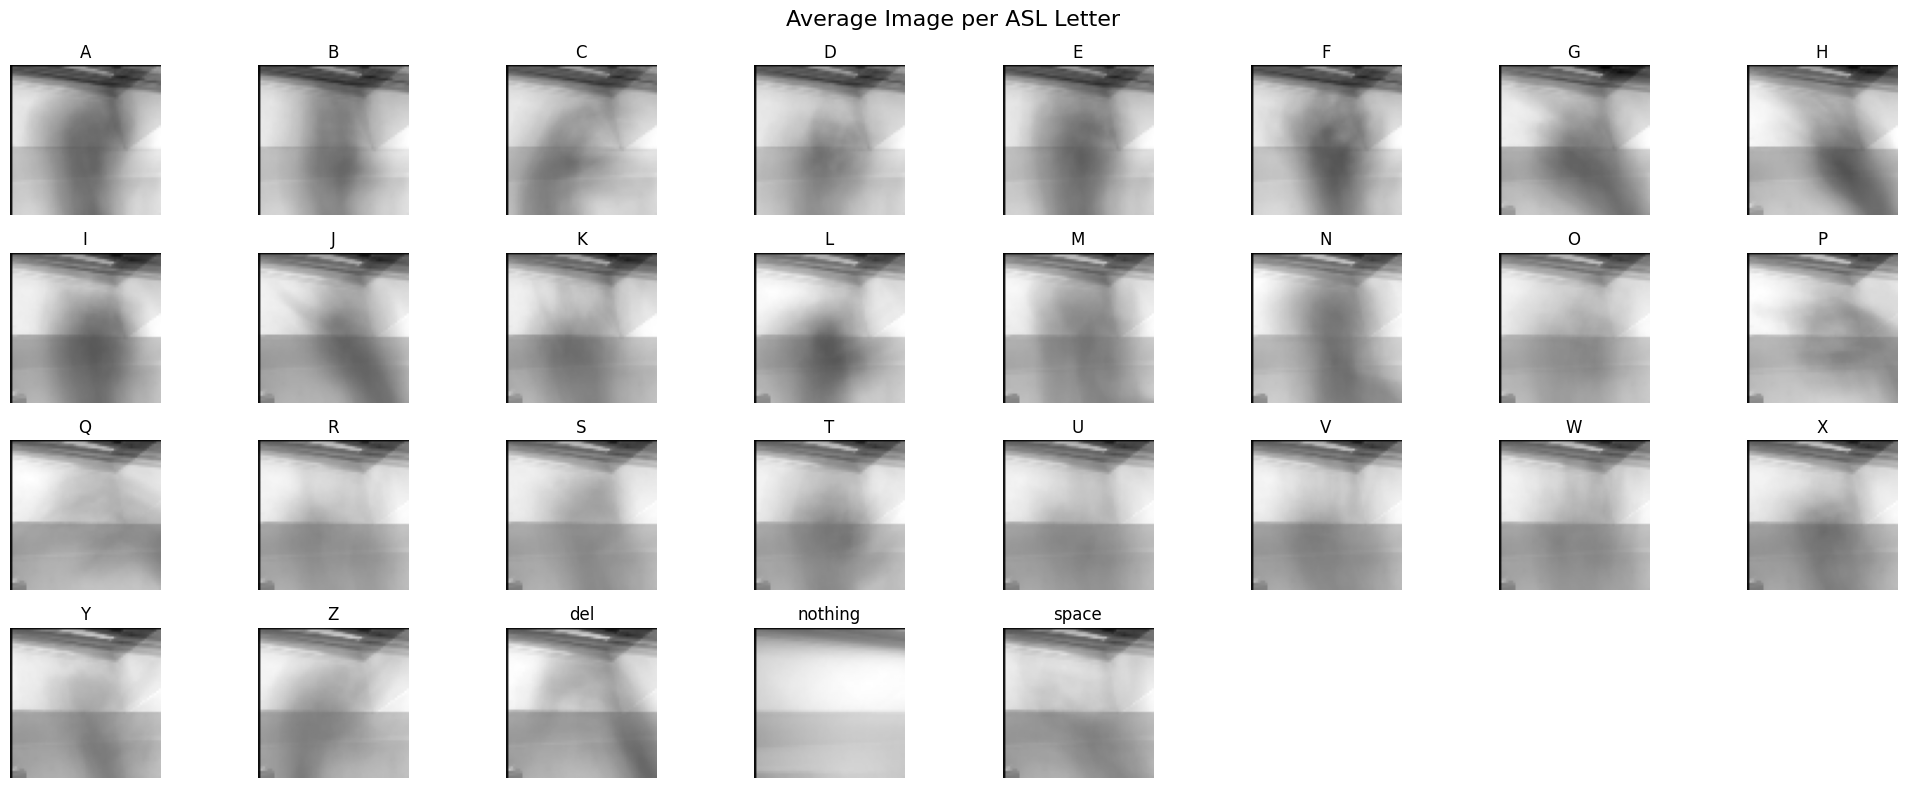

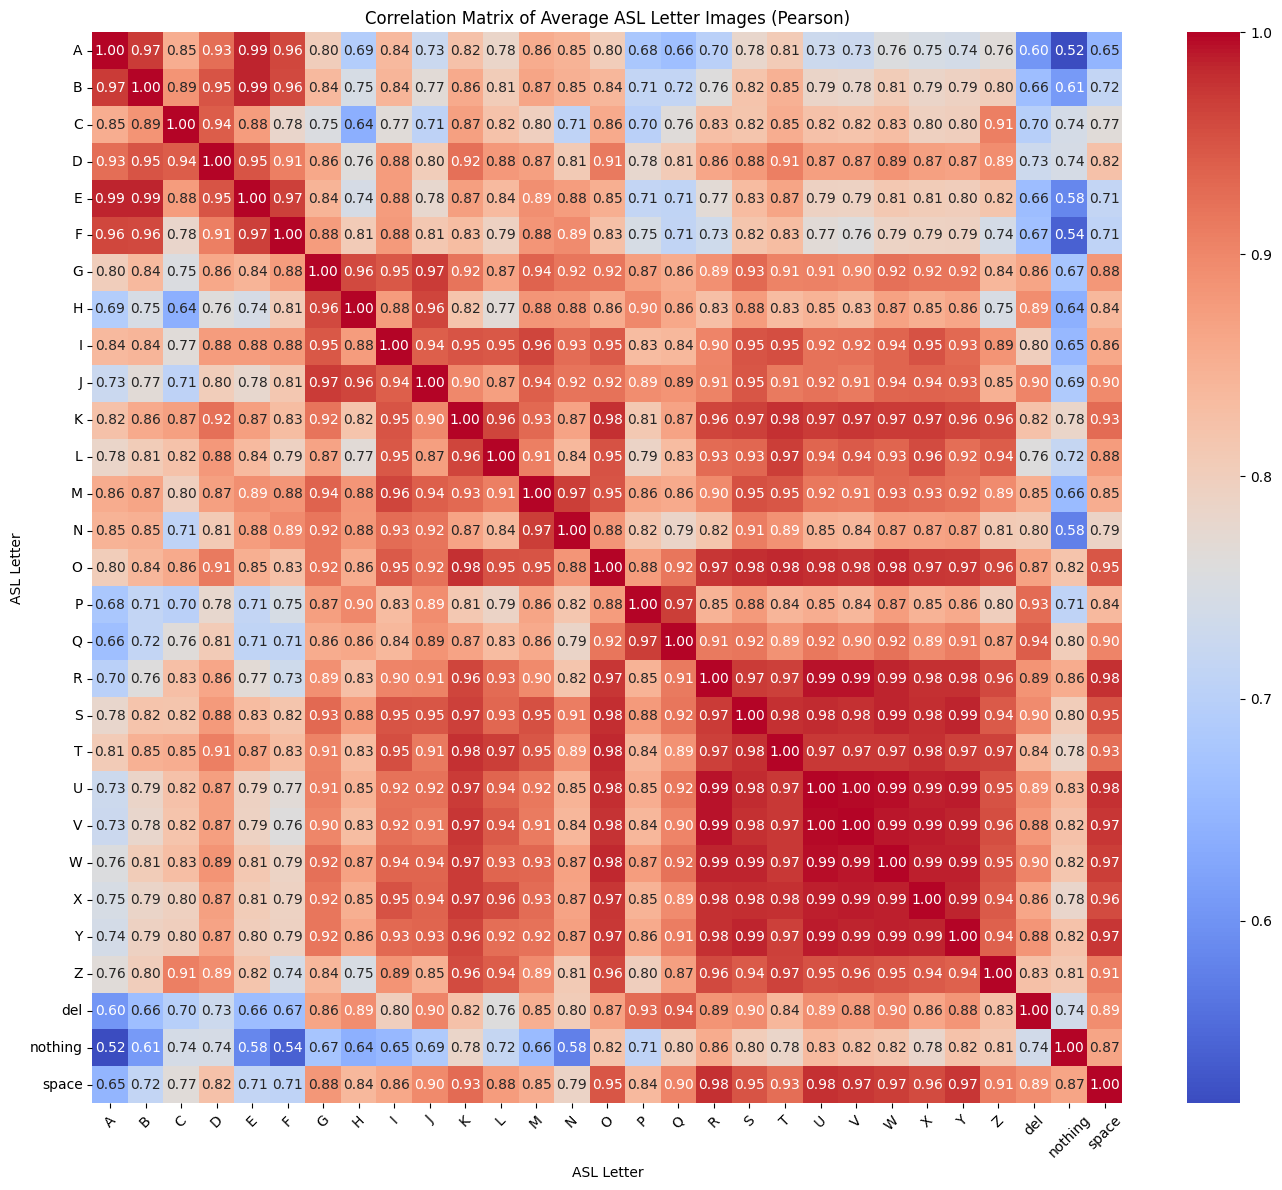

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 1 accuracy: 0.6777


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 2 accuracy: 0.6802


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 3 accuracy: 0.6783


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 4 accuracy: 0.6816


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fold 5 accuracy: 0.6776

Average accuracy across folds: 0.6791


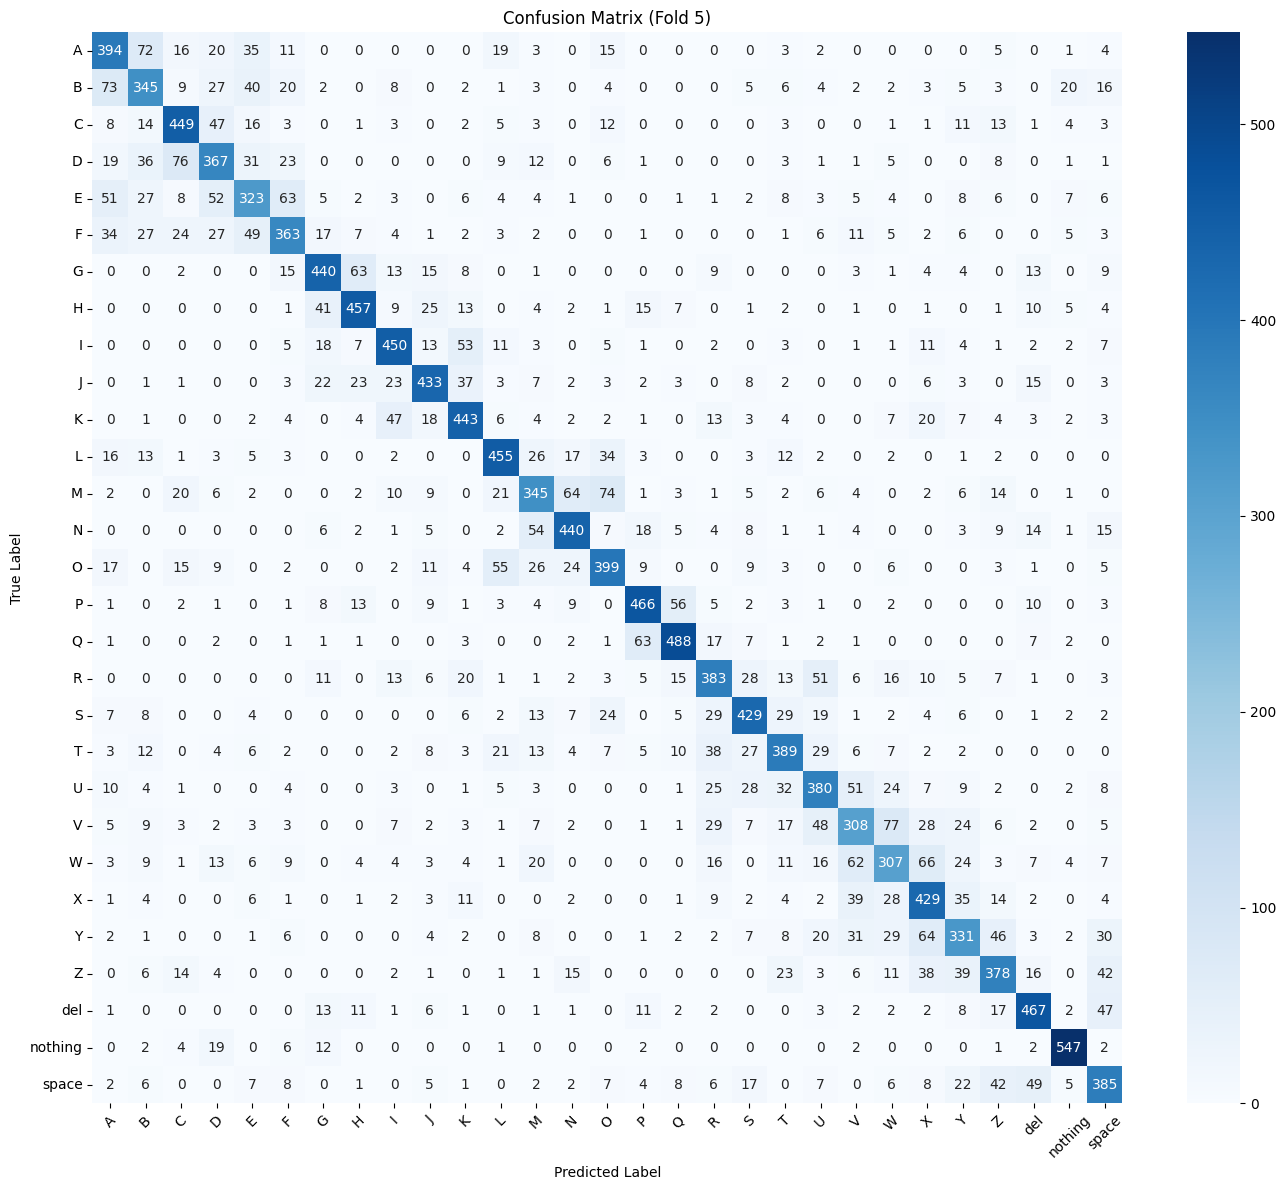

In [ ]:
import os # For interacting with the file system
import numpy as np # For handling arrays and numerical operations
import cv2  # OpenCV library for image loading and processing
from tqdm import tqdm # For displaying a progress bar during loops

from sklearn.metrics.pairwise import cosine_similarity #for creating a correlation matrix for averaging

from sklearn.model_selection import train_test_split #split the data for training and testing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold #for k-fold
from sklearn.decomposition import PCA #for reduction, Use dimensionality reduction (PCA)

import matplotlib.pyplot as plt #for plotting
import seaborn as sns

# Dataset path
DATA_DIR = "asl_alphabet_data/asl_alphabet_train/asl_alphabet_train"

# Get a sorted list of all subfolders (A, B, C, ..., nothing, space, delete)
CATEGORIES = sorted(os.listdir(DATA_DIR))

# Resize images to smaller shape for faster training, uniform
IMG_SIZE = 64

# Prepare image and label lists
x_data = [] # Will store grayscale image arrays
y_labels = [] # Will store corresponding numeric labels (A=0, B=1, C=2...)


#==============================================     Load and preprocess data     =======================================================

# Loop through each category folder (e.g., A, B, C, ..., delete)
for category in tqdm(CATEGORIES):
    folder_path = os.path.join(DATA_DIR, category) #access the specific folder
    label_index = CATEGORIES.index(category) #index of the folder

    for img_name in os.listdir(folder_path)[:]:  # Load 500 images per category
        img_path = os.path.join(folder_path, img_name) #path of the image

        # Load the image in grayscale (black-and-white mode)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None: #skip the image file if it doesn't load
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) #resize all images to 32x32

        img = img.flatten() / 255.0  # Flatten to 1D and normalize, [0,255] --> [0,1]

        #add to the vectors
        x_data.append(img)
        y_labels.append(label_index)

# Convert to NumPy arrays
x_data = np.array(x_data)
y_labels = np.array(y_labels)


#====================================================     Averaging     ===========================================================
'''Use Averaging to understand all the inputted images.'''
# Mean image per class
mean_images = {}

for i, category in enumerate(CATEGORIES):
    # Select all images with this label
    class_images = x_data[y_labels == i]

    # Compute mean across all samples of this class
    mean_img = np.mean(class_images, axis=0)

    mean_images[category] = mean_img

# Plot the average image per class
plt.figure(figsize=(20, 8))
for i, category in enumerate(CATEGORIES):
    plt.subplot(4, 8, i + 1)
    plt.imshow(mean_images[category].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(category)
    plt.axis('off')
plt.suptitle("Average Image per ASL Letter", fontsize=16)
plt.tight_layout()
plt.show()



#---------------------------------creating a correlation matrix using Pearson-----------------------------

# Compute and visualize correlation matrix
mean_vectors = np.array([mean_images[c] for c in CATEGORIES])  # shape: (29, 256)

'''
Pearson correlation matrix is used for checking 2 vectors to see if they statistically look alike.
Each flattened image has ~256 pixels. Pearson compares the pixel intensity patterns b/w 2 images.
    So, if 2 images have approximately the same pixel patterns, the correlation will be high.
    Else, if the pixel patterns are different, the correlation is low'''

# Pearson correlation matrix
corr_matrix = np.corrcoef(mean_vectors)

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Average ASL Letter Images (Pearson)")
plt.xlabel("ASL Letter")
plt.ylabel("ASL Letter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#===================================================       K-Fold with PCA       ======================================================
'''Principle Component Analysis (PCA): he primary goal is to simplify complex datasets by reducing the number of variables
while preserving the most important structures and patterns'''

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(x_data, y_labels), 1):
    x_train, x_test = x_data[train_idx], x_data[test_idx]
    y_train, y_test = y_labels[train_idx], y_labels[test_idx]

    # PCA to reduce feature dimensionality
    pca = PCA(n_components=200)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    # Train logistic regression
    model = LogisticRegression(max_iter=500, solver='saga', multi_class='multinomial')
    model.fit(x_train_pca, y_train)

    # Evaluate
    y_pred = model.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold} accuracy: {acc:.4f}")

# Final average
print(f"\nAverage accuracy across folds: {np.mean(accuracies):.4f}")




#========================================    Generate confusion matrix (for last fold)    ===================================
'''
A confusion matrix is a table used to evaluate the performance of a classification model.
It shows the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN)
predictions made by the model.
'''

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title(f"Confusion Matrix (Fold {fold})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
#----------------------------------------------------------


---------------

#Model using CNN

100%|██████████| 29/29 [01:24<00:00,  2.93s/it]


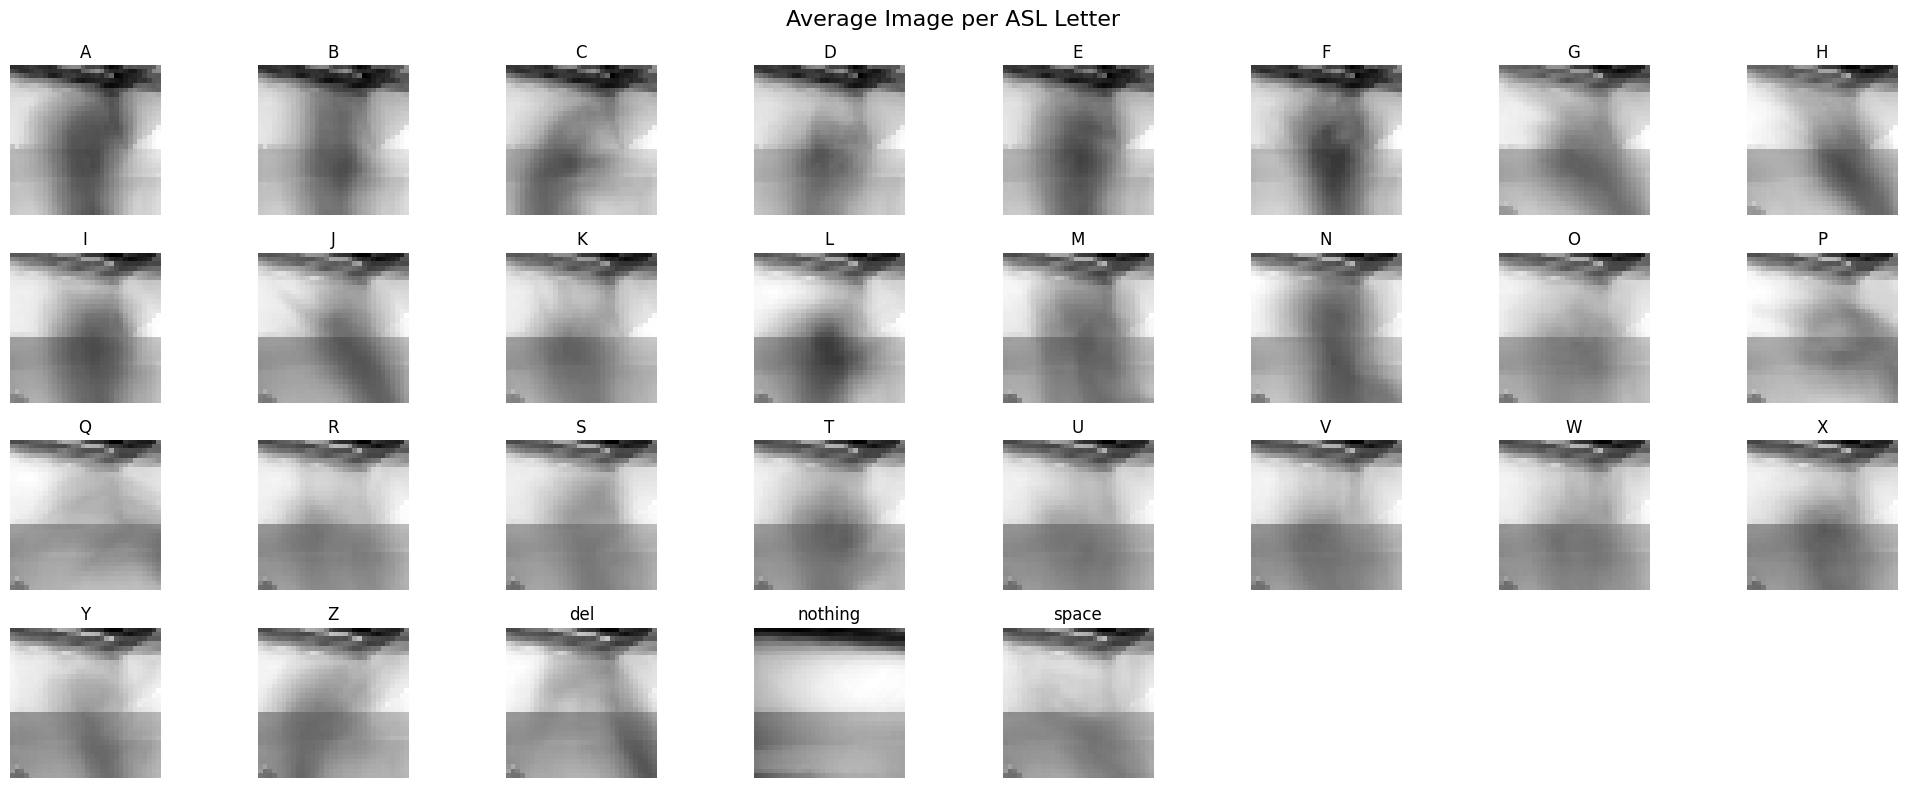

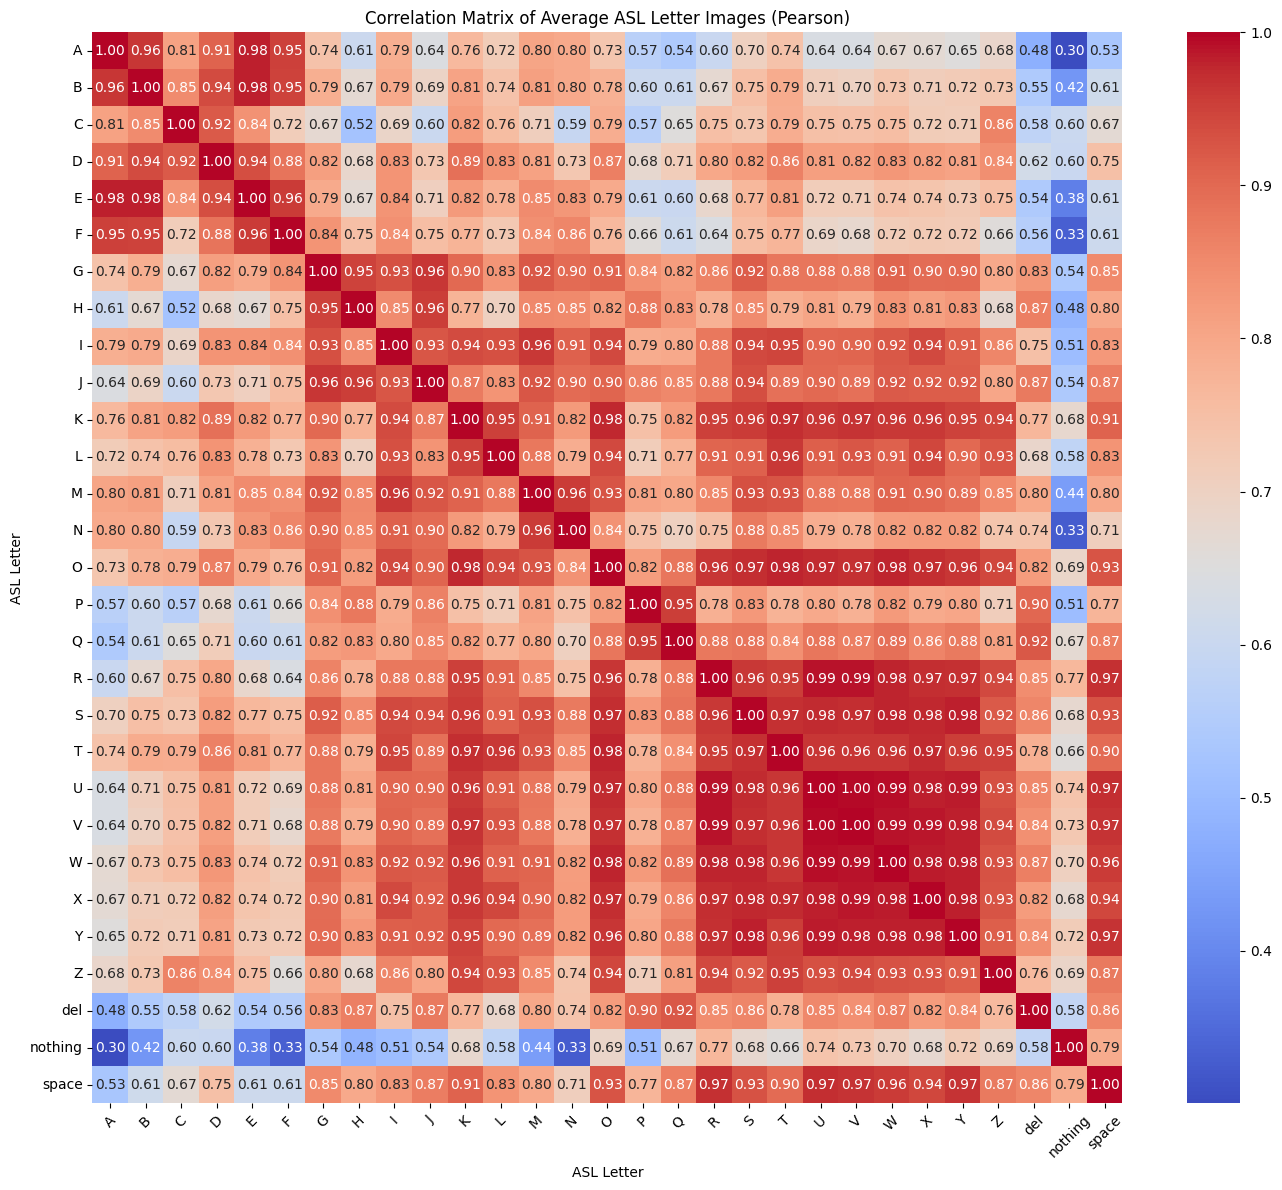

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317,597 (1.21 MB)

 Trainable params: 317,597 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.2328 - loss: 2.6395 - val_accuracy: 0.7578 - val_loss: 0.9087
Epoch 2/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.6353 - loss: 1.1034 - val_accuracy: 0.8760 - val_loss: 0.4815
Epoch 3/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.7553 - loss: 0.7192 - val_accuracy: 0.9231 - val_loss: 0.2934
Epoch 4/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 85s 80ms/step - accuracy: 0.8095 - loss: 0.5516 - val_accuracy: 0.9461 - val_loss: 0.2286
Epoch 5/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.8463 - loss: 0.4361 - val_accuracy: 0.9524 - val_loss: 0.1724
Epoch 6/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.8691 - loss: 0.3757 - val_accuracy: 0.9688 - val_loss: 0.1272
Epoch 7/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.8849 - loss: 0.3225 - val_accuracy: 0.9757 - val_loss: 0.1000
Epoch 8/10
979/979 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8972 - loss: 0.2904 - 

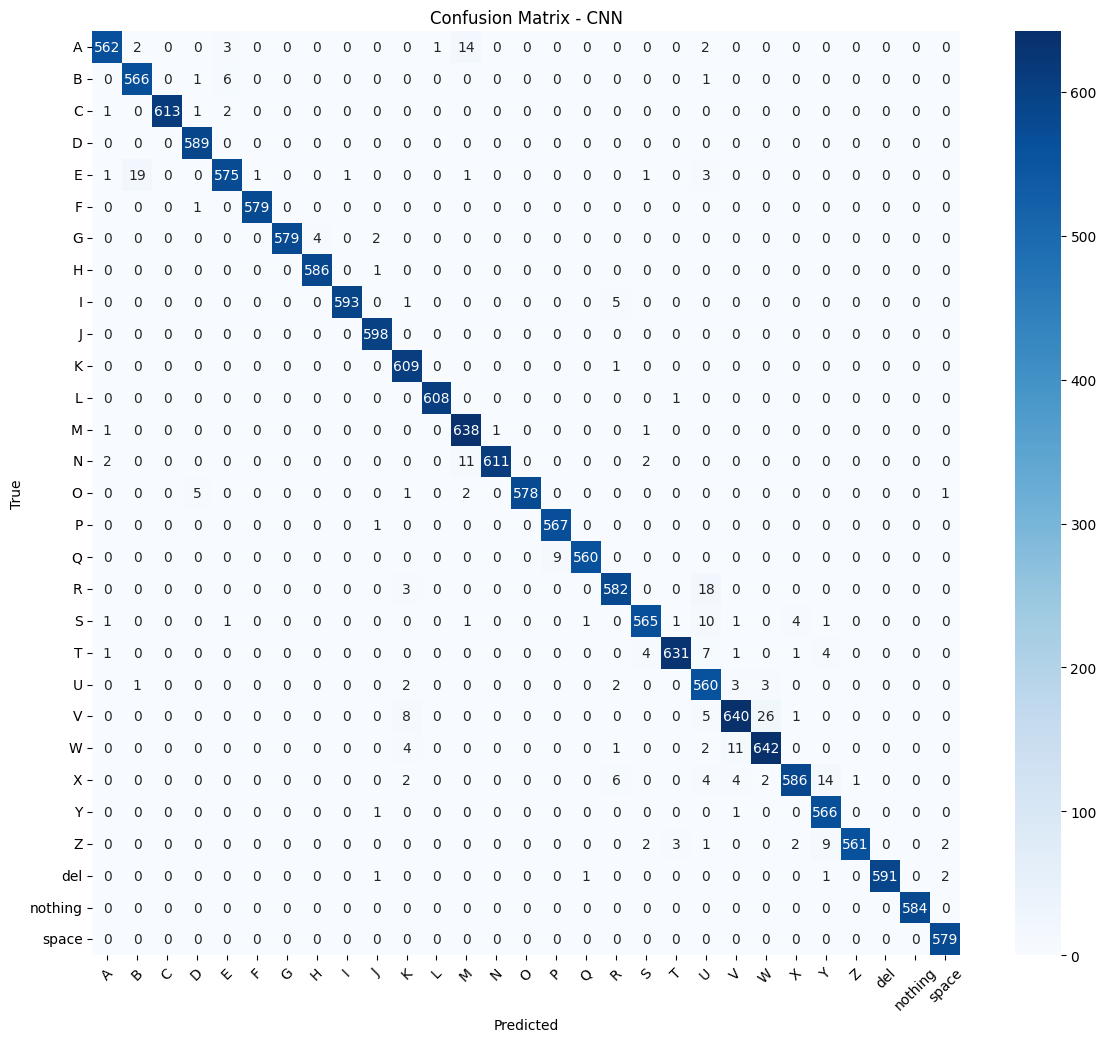

In [ ]:
import os # For interacting with the file system
import numpy as np # For handling arrays and numerical operations
import cv2  # OpenCV library for image loading and processing
from tqdm import tqdm # For displaying a progress bar during loops

# Dataset path
DATA_DIR = "asl_alphabet_data/asl_alphabet_train/asl_alphabet_train"

# Get a sorted list of all subfolders (A, B, C, ..., nothing, space, delete)
CATEGORIES = sorted(os.listdir(DATA_DIR))

# Resize images to smaller shape for faster training, uniform
IMG_SIZE = 32

# Prepare image and label lists
x_data = [] # Will store grayscale image arrays
y_labels = [] # Will store corresponding numeric labels (A=0, B=1, C=2...)


#==============================================     Load and preprocess data     =======================================================

# Loop through each category folder (e.g., A, B, C, ..., delete)
for category in tqdm(CATEGORIES):
    folder_path = os.path.join(DATA_DIR, category) #access the specific folder
    label_index = CATEGORIES.index(category) #index of the folder

    for img_name in os.listdir(folder_path)[:]:  # Load 500 images per category
        img_path = os.path.join(folder_path, img_name) #path of the image

        # Load the image in grayscale (black-and-white mode)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None: #skip the image file if it doesn't load
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) #resize all images to 32x32

        img = img.reshape(IMG_SIZE, IMG_SIZE, 1) / 255.0  # Keep shape for CNN

        x_data.append(img)
        y_labels.append(label_index)

# Convert to NumPy arrays
x_data = np.array(x_data)
y_labels = np.array(y_labels)


'''Understand the Data by finding the average of all images and creating a correlation matrix'''
#====================================================     Averaging     ===========================================================
'''Use Averaging to understand all the inputted images.'''
# Mean image per class
mean_images = {}

for i, category in enumerate(CATEGORIES):
    # Select all images with this label
    class_images = x_data[y_labels == i]

    # Compute mean using numpy across all samples of this class
    mean_img = np.mean(class_images, axis=0)

    mean_images[category] = mean_img

# Plot the average image per class
plt.figure(figsize=(20, 8))
for i, category in enumerate(CATEGORIES):
    plt.subplot(4, 8, i + 1)
    plt.imshow(mean_images[category].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(category)
    plt.axis('off')
plt.suptitle("Average Image per ASL Letter", fontsize=16)
plt.tight_layout()
plt.show()



#---------------------------------creating a correlation matrix using pearson correlation matrix cosine_similarity-----------------------------

# Compute and visualize correlation matrix
mean_vectors = np.array([mean_images[c].flatten() for c in CATEGORIES])  # shape: (29, 1024)

'''
Pearson correlation matrix is used for checking 2 vectors to see if they statistically look alike.
Each flattened image has ~256 pixels. Pearson compares the pixel intensity patterns b/w 2 images.
    So, if 2 images have approximately the same pixel patterns, the correlation will be high.
    Else, if the pixel patterns are different, the correlation is low'''

# Pearson correlation matrix
corr_matrix = np.corrcoef(mean_vectors)

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Average ASL Letter Images (Pearson)")
plt.xlabel("ASL Letter")
plt.ylabel("ASL Letter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##preprocess labels and split data-------------------------------
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

y_cat = to_categorical(y_labels, num_classes=len(CATEGORIES))

# Split into train (80%) and test (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_cat, test_size=0.2, random_state=42)

##build and train CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(CATEGORIES), activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

#evalutate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


#confusion matrix------------------------------------------
'''
A confusion matrix is a table used to evaluate the performance of a classification model.
It shows the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN)
predictions made by the model.
'''

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt #for plotting

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.show()



------






#Debugging

In [ ]:

#For training the model without K-Fold, uncomment this section--------------------------------------------------------------------------
'''
# Split into train (80%) and test (20%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.2, random_state=42)

#Train logistic regression model

print("Training Logistic Regression...")
model = LogisticRegression(max_iter=500, verbose=1, multi_class='multinomial', solver='saga')
model.fit(x_train, y_train)

#3. Use dimensionality reduction (PCA)
This reduces feature count before training:

# Reduce from 1024 features to 100 principal components
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train on reduced data
model = LogisticRegression(max_iter=500, solver='saga', multi_class='multinomial')
model.fit(x_train_pca, y_train)

# Evaluate
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=CATEGORIES))
'''

'''
# Confusion matrix - plot to visualize
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=CATEGORIES, yticklabels=CATEGORIES, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
'''
#------------------------------------------------------------------------------------------------------------------------


In [ ]:
'''Cosine similarity decides how similar vectors are based on the angle between them. Each average image is a vector after being flattened.
If 2 vectors are similar, the angle between them is small and the cosine similarity is close to 1.
If the angle between the vectors is large: the cosine similarity is close to 0. '''

cos_sim_matrix = cosine_similarity(mean_vectors)

plt.figure(figsize=(14, 12))
sns.heatmap(cos_sim_matrix, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt=".2f", cmap="viridis")
plt.title("Cosine Similarity Between ASL Average Letter Images")
plt.xlabel("ASL Letter")
plt.ylabel("ASL Letter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np               # For handling arrays and numerical operations
import os                       # For interacting with the file system
import cv2                      # OpenCV library for image loading and processing
from tqdm import tqdm           # For displaying a progress bar during loops

# Set the path to the training dataset directory
DATA_DIR = 'asl_alphabet_data/asl_alphabet_train/asl_alphabet_train'

# Get a sorted list of all subfolders (A, B, C, ..., nothing, space, delete)
CATEGORIES = sorted(os.listdir(DATA_DIR))

# Optional: print the list of category names to confirm
print(CATEGORIES)

# Create empty lists to store the image data and corresponding labels
x_data = []        # Will store grayscale image arrays
y_labels = []      # Will store corresponding numeric labels (A=0, B=1, C=2...)

# Loop through each category folder (e.g., A, B, C, ..., delete)
for category in tqdm(CATEGORIES):
    folder_path = os.path.join(DATA_DIR, category)     # Path to the specific category folder
    label_index = CATEGORIES.index(category)           # Use index of category as label (e.g., A=0, B=1, etc.)

    # Loop through each image file in the folder (limit to 500 images per category)
    for img_name in os.listdir(folder_path)[:500]:     # [:500] is to avoid memory overload
        img_path = os.path.join(folder_path, img_name) # Get full path to the image

        # Load the image in grayscale (black-and-white mode)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            continue  # Skip if the image failed to load

        # Resize image to 64x64 pixels (from original 200x200) for faster processing
        img = cv2.resize(img, (64, 64)) ## resize all images to 64x64 for uniformity

        # Normalize pixel values to range [0, 1] by dividing by 255.0
        img = img / 255.0

        # Add the processed image to the x_data list
        x_data.append(img)

        # Add the numeric label to y_labels list
        y_labels.append(label_index)

# Convert the image list into a NumPy array and reshape it to (num_samples, 64, 64, 1)
# The '1' is for the single grayscale channel (CNN expects 4D input)
x_data = np.array(x_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Convert labels list to NumPy array as well
y_labels = np.array(y_labels)

# Print shapes to confirm data loaded correctly
print("x_data shape:", x_data.shape)      # Should be (num_samples, 64, 64, 1)
print("y_labels shape:", y_labels.shape)  # Should be (num_samples,)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def jpg_to_bw_array(path: str, threshold: int = 128) -> np.ndarray:
    """
    Load a JPEG image, convert to grayscale, threshold to pure B/W,
    and return the resulting 2D uint8 array (0 or 255).

    Args:
        path:     filesystem path to the input JPG.
        threshold: pixel-value cutoff (0–255); >= becomes white.

    Returns:
        A H×W array of dtype uint8, values in {0,255}.
    """
    # load in grayscale
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if gray is None:
        raise FileNotFoundError(f"Could not read image: {path}")

    # threshold → binary image
    _, bw = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    return bw

def visualize_array(arr: np.ndarray, title: str = None) -> None:
    """
    Display a 2D array as an image.

    Args:
        arr:   2D numeric array (e.g. grayscale or binary image).
        title: optional title for the plot window.
    """
    plt.figure()
    if title:
        plt.title(title)
    plt.imshow(arr, cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.show()
